In [4]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns

In [5]:
import plotly.graph_objects as go
import plotly.express as px

In [6]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [7]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Helvetica")
sns.set_context(font_scale=0.8)

In [8]:
data_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/data_transfer/Cropped/DIC_Baseline_2.6_cropped.nc', decode_times=True).sel(deptht=slice(0, 100))

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/pyproj/__init__.py:89: UserWarning:

pyproj unable to set database path.



In [9]:
data_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/data_transfer/Cropped/DIC_OAE_2.6_cropped.nc', decode_times=True).sel(deptht=slice(0, 100))

In [10]:
data_baseline = data_baseline.where(data_baseline)
data_oae = data_oae.where(data_oae)

In [11]:
sliced_data_baseline = data_baseline.where((3 < data_baseline.nav_lon) & (data_baseline.nav_lon < 4) & (52 < data_baseline.nav_lat) & (data_baseline.nav_lat < 53), drop=True)
sliced_frame_baseline = sliced_data_baseline.sel(time_counter=slice('2090', '2100'))

In [12]:
sliced_data_oae = data_oae.where((3 < data_oae.nav_lon) & (data_oae.nav_lon < 4) & (52 < data_oae.nav_lat) & (data_oae.nav_lat < 53), drop=True)
sliced_frame_oae = sliced_data_oae.sel(time_counter=slice('2090', '2100'))

### EU Seasonal Average of DIC

In [13]:
data_baseline_plot = sliced_data_baseline.DIC.mean(dim=('y', 'x', 'deptht'))
data_oae_plot = sliced_data_oae.DIC.mean(dim=('y', 'x', 'deptht'))

In [14]:
data_baseline_plot = data_baseline_plot.to_dataset()
data_oae_plot = data_oae_plot.to_dataset()

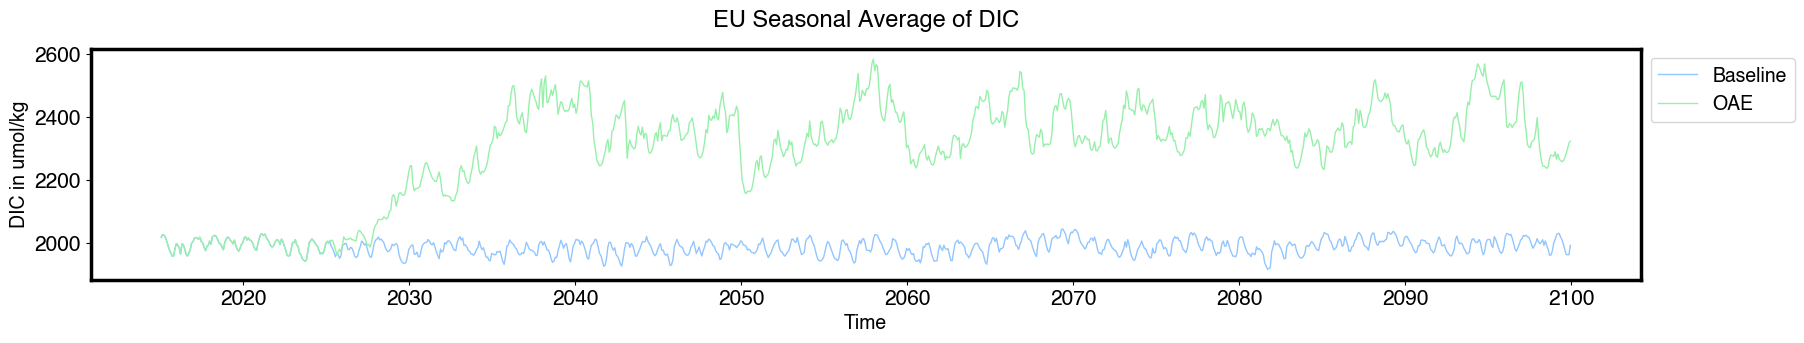

In [15]:
plt.figure(figsize=(20, 3))
plt.plot(data_baseline_plot.time_counter, data_baseline_plot.DIC, linewidth=1, label = 'Baseline')
plt.plot(data_oae_plot.time_counter, data_oae_plot.DIC, linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC in umol/kg", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Seasonal Average of DIC', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

In [16]:
sliced_frame_baseline_plot = sliced_frame_baseline.DIC.mean(dim=('y', 'x', 'deptht'))
sliced_frame_oae_plot = sliced_frame_oae.DIC.mean(dim=('y', 'x', 'deptht'))

In [17]:
sliced_frame_baseline_plot = sliced_frame_baseline_plot.to_dataset()
sliced_frame_oae_plot = sliced_frame_oae_plot.to_dataset()

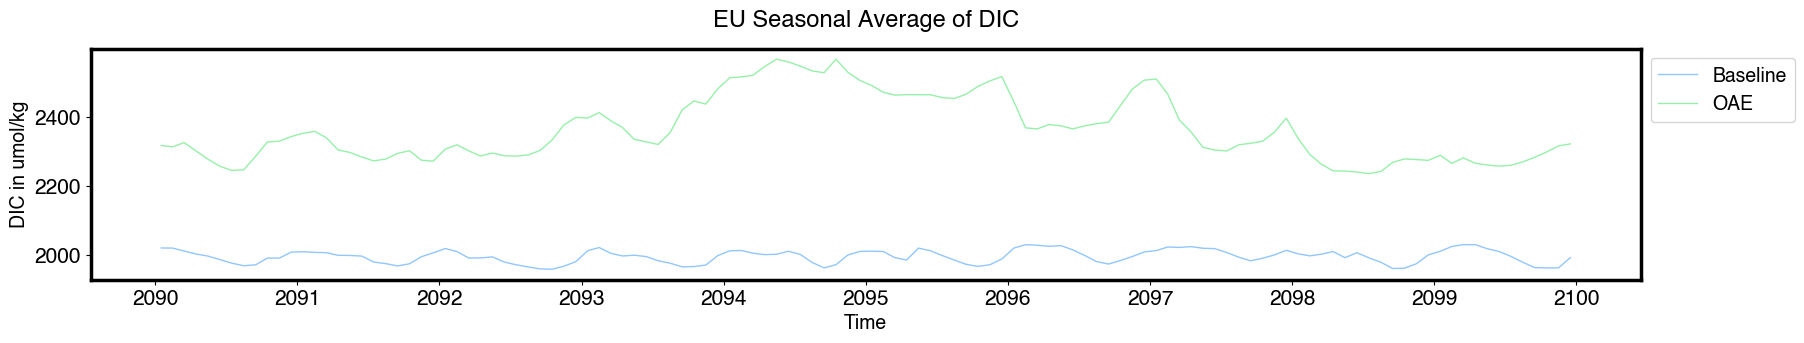

In [18]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_frame_baseline_plot.time_counter, sliced_frame_baseline_plot.DIC, linewidth=1, label = 'Baseline')
plt.plot(sliced_frame_oae_plot.time_counter, sliced_frame_oae_plot.DIC, linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC in umol/kg", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Seasonal Average of DIC', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### Unweighted EU Seasonal Average of DIC

In [19]:
start_date = "2090-01-01"
end_date = "2100-01-01"

dic_baseline = sliced_data_baseline["DIC"].sel(time_counter=slice(start_date, end_date))

In [20]:
dic_season_summary_baseline = dic_baseline.groupby('time_counter.season').mean('time_counter', skipna=True)
dic_season_mean_all_years_baseline = dic_baseline.resample(time_counter='QS-DEC').mean(keep_attrs=True)
dic_seasonal_mean_baseline = dic_season_mean_all_years_baseline.groupby('time_counter').mean(["y", "x", "deptht"])

In [21]:
start_date = "2090-01-01"
end_date = "2100-01-01"

dic_oae = sliced_data_oae["DIC"].sel(time_counter=slice(start_date, end_date))

In [22]:
dic_season_summary_oae = dic_oae.groupby('time_counter.season').mean('time_counter', skipna=True)
dic_season_mean_all_years_oae = dic_oae.resample(time_counter='QS-DEC').mean(keep_attrs=True)
dic_seasonal_mean_oae = dic_season_mean_all_years_oae.groupby('time_counter').mean(["y", "x", "deptht"])

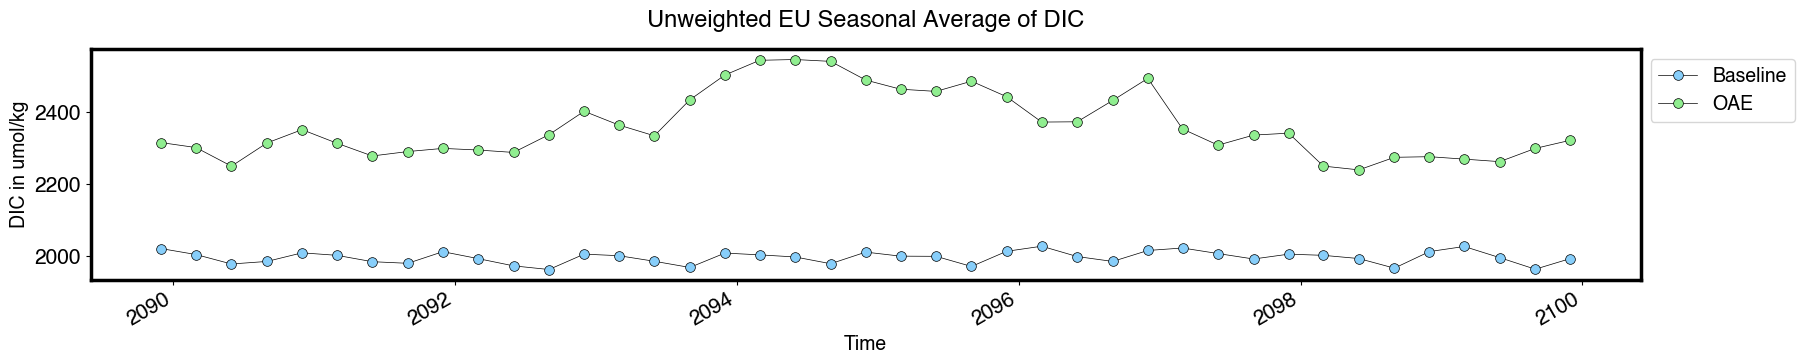

In [23]:
f, ax = plt.subplots(figsize=(20, 3))

dic_seasonal_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

dic_seasonal_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted EU Seasonal Average of DIC", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC in umol/kg", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of DIC

In [24]:
month_length_baseline = dic_baseline.time_counter.dt.days_in_month
dic_weighted_mean_baseline = ((dic_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())
dic_weighted_mean_baseline = dic_weighted_mean_baseline.where(dic_weighted_mean_baseline)
dic_weighted_season_baseline = dic_weighted_mean_baseline.groupby('time_counter').mean(["y", "x", "deptht"])

In [25]:
month_length_oae = dic_oae.time_counter.dt.days_in_month
dic_weighted_mean_oae = ((dic_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())
dic_weighted_mean_oae = dic_weighted_mean_oae.where(dic_weighted_mean_oae)
dic_weighted_season_oae = dic_weighted_mean_oae.groupby('time_counter').mean(["y", "x", "deptht"])

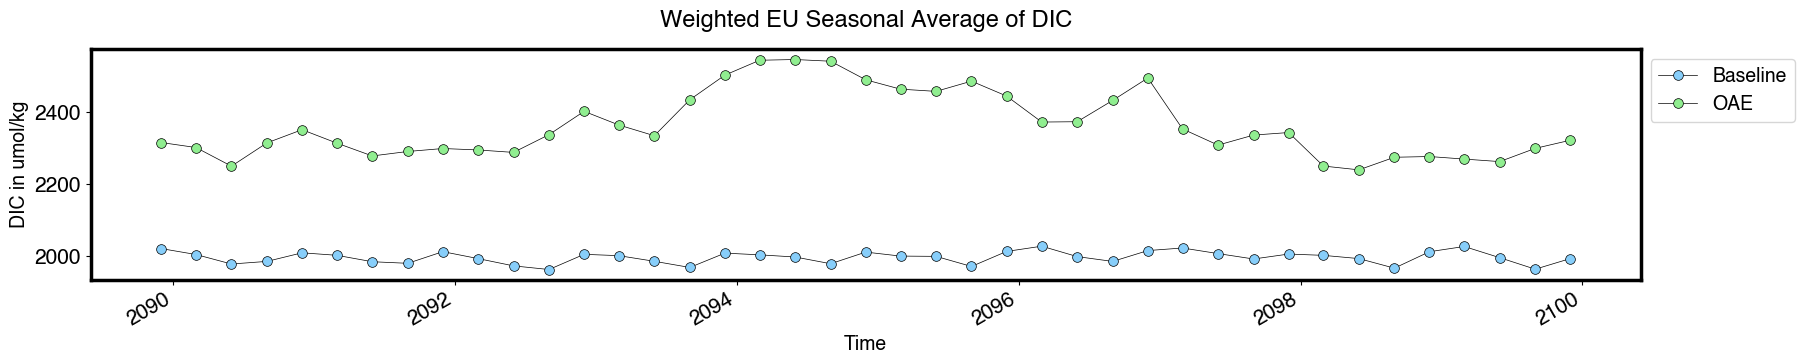

In [26]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, ax = plt.subplots(figsize=(20, 3))
dic_weighted_season_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

dic_weighted_season_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Weighted EU Seasonal Average of DIC", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC in umol/kg", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of DIC (seasons displayed)

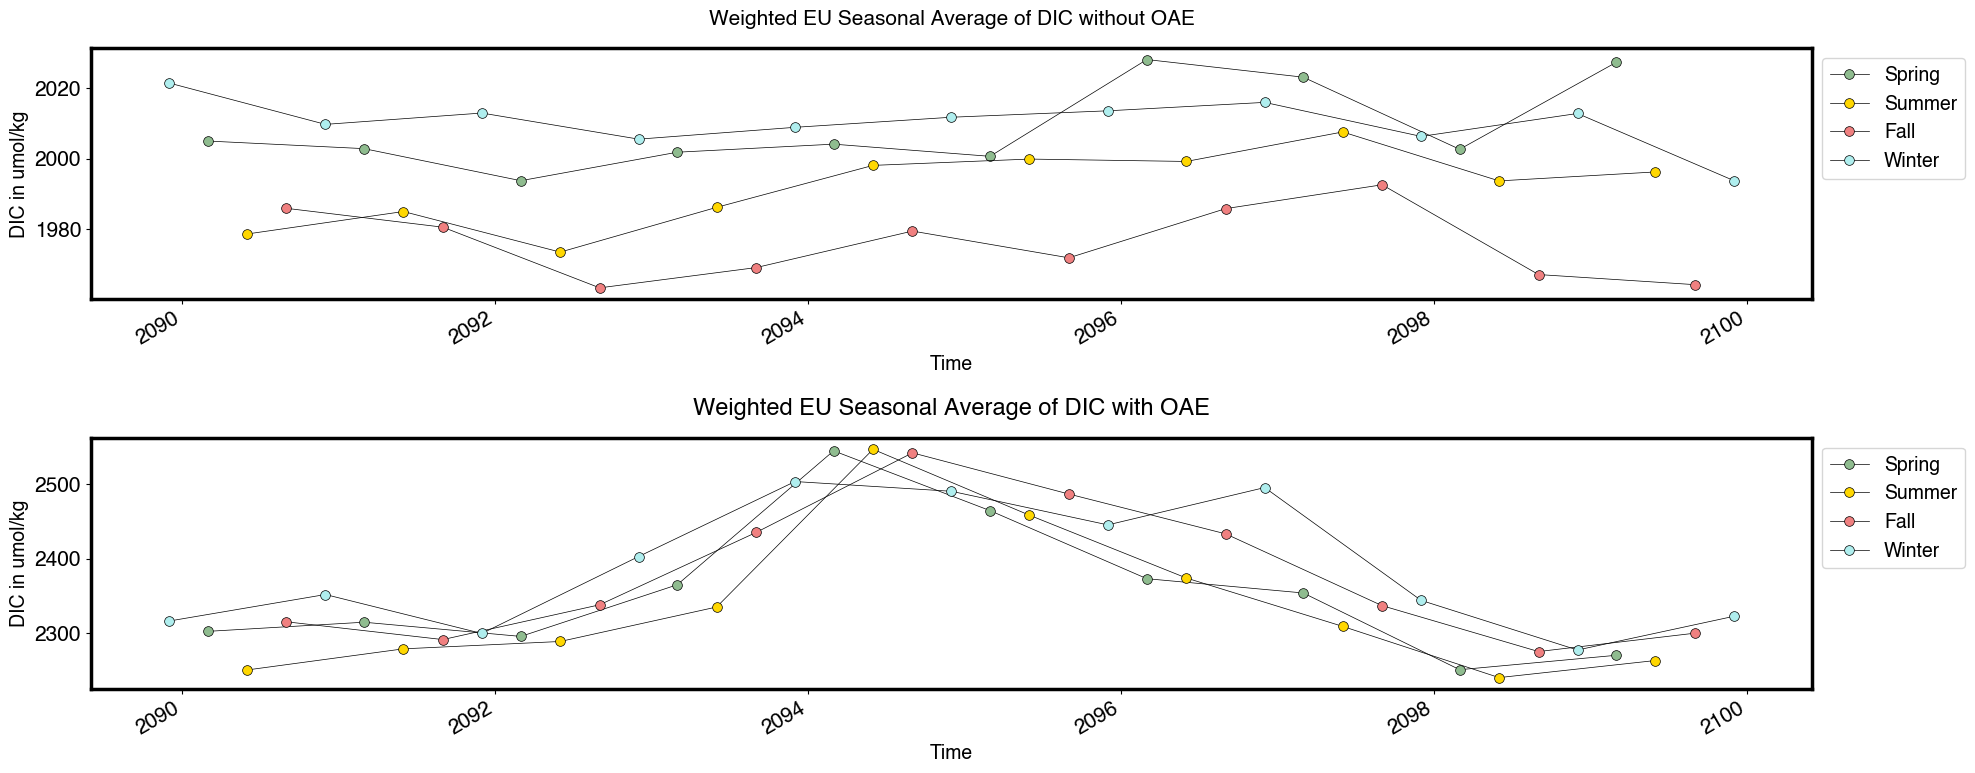

In [27]:
colors = {3: "darkseagreen", 6: "gold", 9: "lightcoral", 12: "paleturquoise"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharey=False)
for month, arr in dic_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5,
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax1.set_title("Weighted EU Seasonal Average of DIC without OAE", fontsize=15, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('DIC in umol/kg', fontsize=14)

for month, arr in dic_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5,
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax2.set_title("Weighted EU Seasonal Average of DIC with OAE", fontname="Helvetica", fontsize=17, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('DIC in umol/kg', fontsize=14)
f.tight_layout()
plt.show()

### Weighted EU Seasonal Average of DIC without OAE (seasons displayed)

In [28]:
dic_weighted_baseline = dic_weighted_season_baseline.to_dataframe('DIC_Flux')
dic_weighted_baseline['Month'] = pd.DatetimeIndex(dic_weighted_baseline.index).month

In [29]:
conditions = [
    (dic_weighted_baseline['Month'] == 3),
    (dic_weighted_baseline['Month'] == 6),
    (dic_weighted_baseline['Month'] == 9),
    (dic_weighted_baseline['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

dic_weighted_baseline['Month'] = np.select(conditions, values)

In [30]:
colors = dict(zip(dic_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

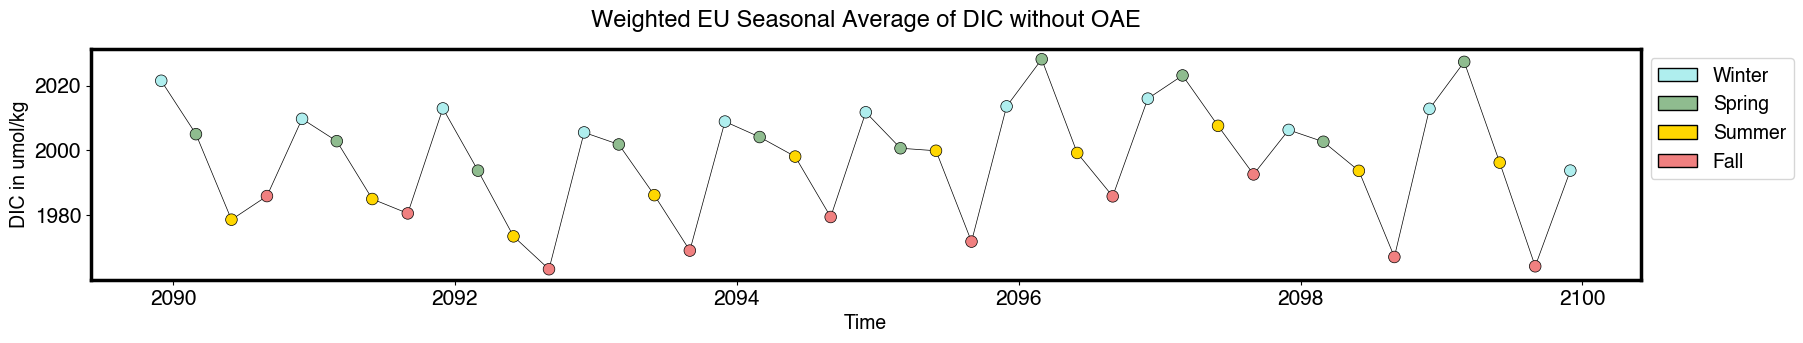

In [31]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(dic_weighted_baseline.index, dic_weighted_baseline.DIC_Flux, '-', color="black",  linewidth=0.5, markeredgewidth=0.5, zorder=1)
ax.scatter(dic_weighted_baseline.index, dic_weighted_baseline.DIC_Flux, color=dic_weighted_baseline.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC in umol/kg', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of DIC without OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of DIC with OAE (seasons displayed)

In [32]:
dic_weighted_oae = dic_weighted_season_oae.to_dataframe('DIC_Flux')
dic_weighted_oae['Month'] = pd.DatetimeIndex(dic_weighted_oae.index).month

In [33]:
conditions = [
    (dic_weighted_oae['Month'] == 3),
    (dic_weighted_oae['Month'] == 6),
    (dic_weighted_oae['Month'] == 9),
    (dic_weighted_oae['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

dic_weighted_oae['Month'] = np.select(conditions, values)

In [34]:
colors = dict(zip(dic_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

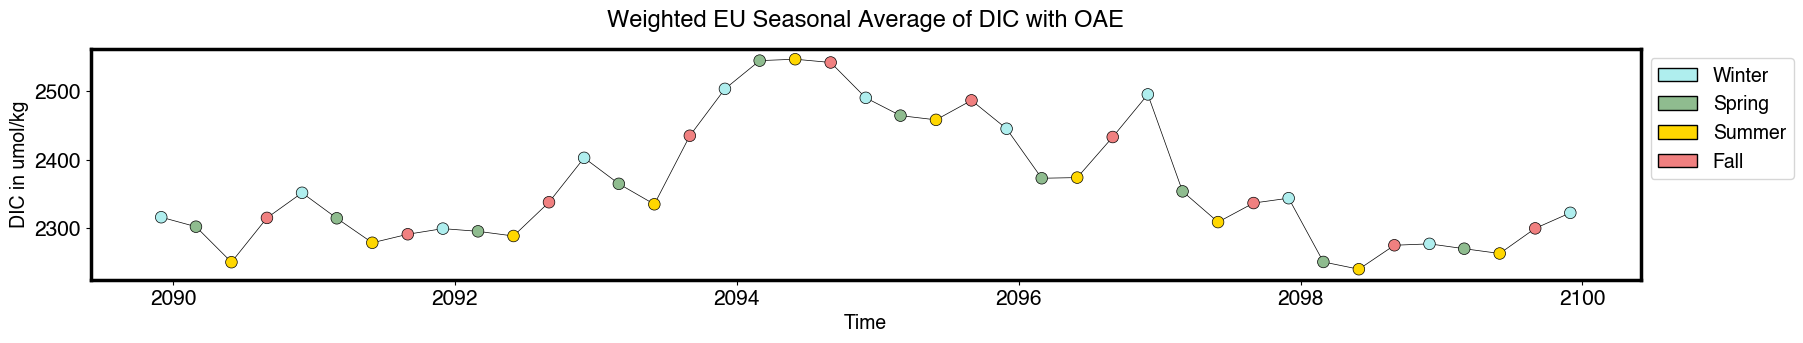

In [35]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(dic_weighted_oae.index, dic_weighted_oae.DIC_Flux, '-', color="black",  linewidth=0.5, zorder=1)
ax.scatter(dic_weighted_oae.index, dic_weighted_oae.DIC_Flux, color=dic_weighted_oae.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC in umol/kg', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of DIC with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of DIC (seasons displayed)

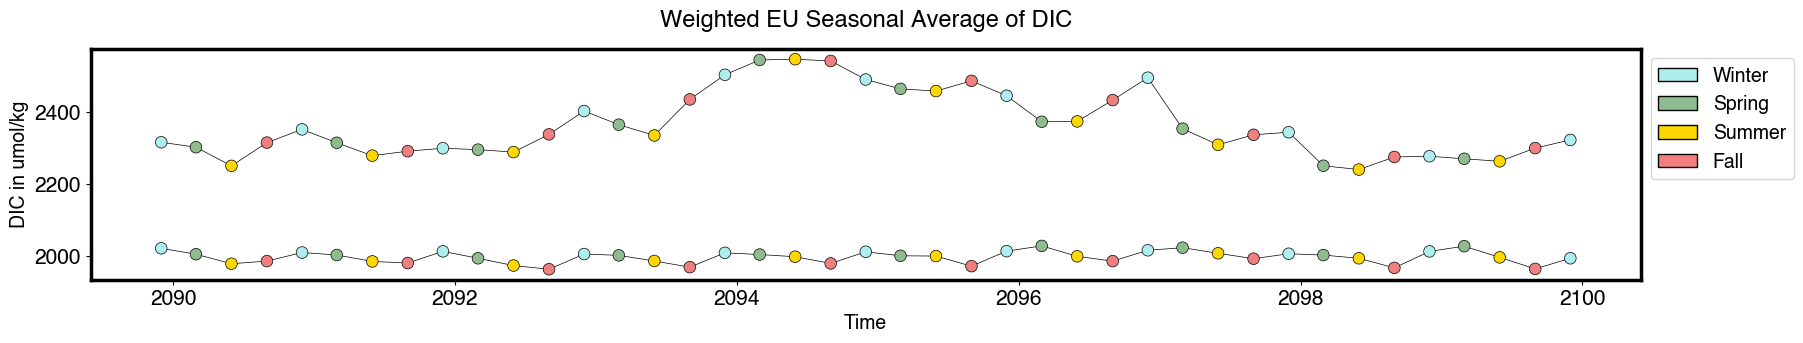

In [36]:
colors = dict(zip(dic_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))
colors = dict(zip(dic_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(dic_weighted_baseline.index, dic_weighted_baseline.DIC_Flux, '-', color="black",  linewidth=0.5, zorder=1)
ax.scatter(dic_weighted_baseline.index, dic_weighted_baseline.DIC_Flux, color=dic_weighted_baseline.Month.map(lambda x: colors[x]), marker='o', edgecolors='black',  linewidth=0.5, s=70)

ax.plot_date(dic_weighted_oae.index, dic_weighted_oae.DIC_Flux, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(dic_weighted_oae.index, dic_weighted_oae.DIC_Flux, color=dic_weighted_oae.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC in umol/kg', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of DIC", fontname="Helvetica", fontsize=17, y=1.06)

pass

### EU Monthly Average of DIC without OAE

In [37]:
start_date_month = "2090-01-01"
end_date_month = "2100-01-01"

dic_baseline_month = sliced_data_baseline["DIC"].sel(time_counter=slice(start_date_month, end_date_month))

In [38]:
dic_month_summary_baseline = dic_baseline_month.groupby('time_counter.season').mean('time_counter', skipna=True)
dic_month_mean_all_years_baseline = dic_baseline_month.resample(time_counter='M').mean(keep_attrs=True)
dic_monthly_mean_baseline = dic_month_mean_all_years_baseline.groupby('time_counter').mean(["y", "x", "deptht"])

In [39]:
dic_oae_month = sliced_data_oae["DIC"].sel(time_counter=slice(start_date_month, end_date_month))

In [40]:
dic_month_summary_oae = dic_oae_month.groupby('time_counter.season').mean('time_counter', skipna=True)
dic_month_mean_all_years_oae = dic_oae_month.resample(time_counter='M').mean(keep_attrs=True)
dic_monthly_mean_oae = dic_month_mean_all_years_oae.groupby('time_counter').mean(["y", "x", "deptht"])

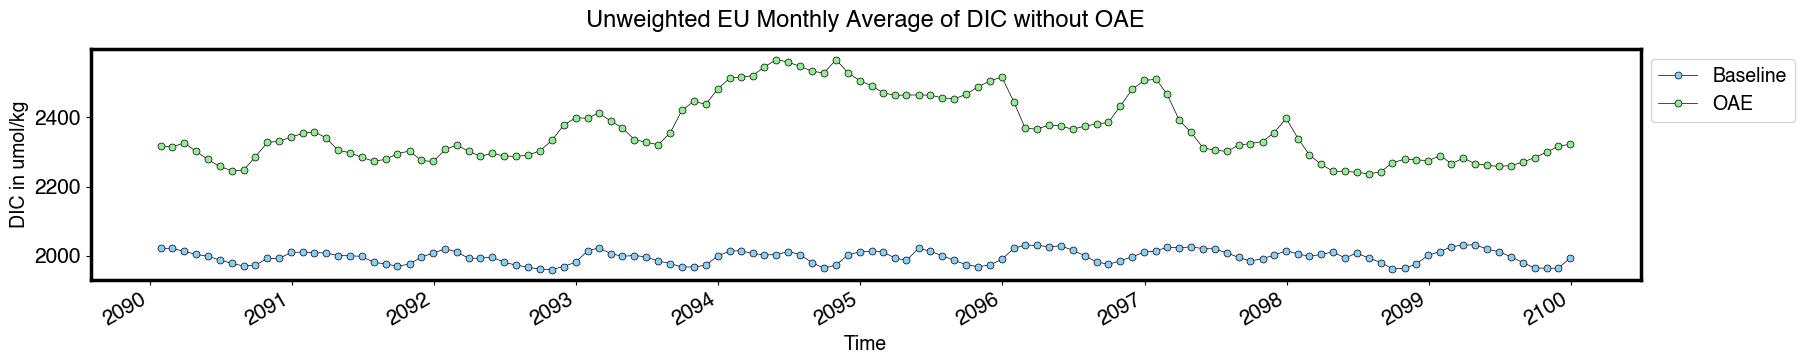

In [41]:
f, ax = plt.subplots(figsize=(20, 3))

dic_monthly_mean_baseline.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

dic_monthly_mean_oae.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted EU Monthly Average of DIC without OAE", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC in umol/kg", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### EU Monthly Average of DIC without OAE (months displayed)

In [42]:
dic_baseline_monthly = dic_monthly_mean_baseline.to_dataframe('DIC')
dic_baseline_monthly['Month'] = pd.DatetimeIndex(dic_baseline_monthly.index).month

In [43]:
conditions = [
    (dic_baseline_monthly['Month'] == 1),
    (dic_baseline_monthly['Month'] == 2),
    (dic_baseline_monthly['Month'] == 3),
    (dic_baseline_monthly['Month'] == 4),
    (dic_baseline_monthly['Month'] == 5),
    (dic_baseline_monthly['Month'] == 6),
    (dic_baseline_monthly['Month'] == 7),
    (dic_baseline_monthly['Month'] == 8),
    (dic_baseline_monthly['Month'] == 9),
    (dic_baseline_monthly['Month'] == 10),
    (dic_baseline_monthly['Month'] == 11),
    (dic_baseline_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

dic_baseline_monthly['Month'] = np.select(conditions, values)

In [44]:
colors = dict(zip(dic_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

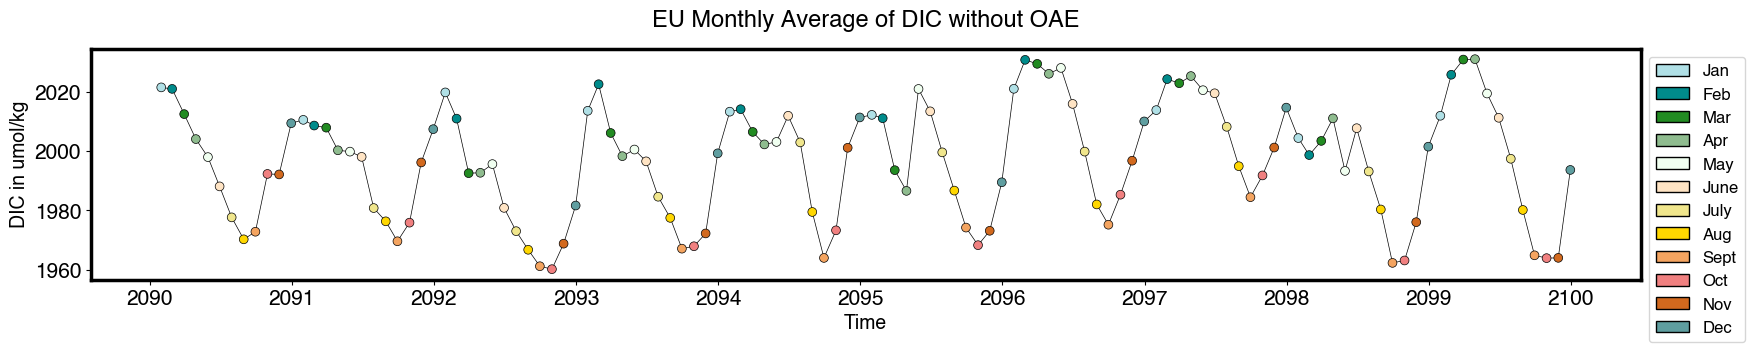

In [45]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(dic_baseline_monthly.index, dic_baseline_monthly.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(dic_baseline_monthly.index, dic_baseline_monthly.DIC, color=dic_baseline_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC in umol/kg', fontsize=14)
ax.set_title("EU Monthly Average of DIC without OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### EU Monthly Average of DIC with OAE (months displayed)

In [46]:
dic_oae_monthly = dic_monthly_mean_oae.to_dataframe('DIC')
dic_oae_monthly['Month'] = pd.DatetimeIndex(dic_oae_monthly.index).month

In [47]:
conditions = [
    (dic_oae_monthly['Month'] == 1),
    (dic_oae_monthly['Month'] == 2),
    (dic_oae_monthly['Month'] == 3),
    (dic_oae_monthly['Month'] == 4),
    (dic_oae_monthly['Month'] == 5),
    (dic_oae_monthly['Month'] == 6),
    (dic_oae_monthly['Month'] == 7),
    (dic_oae_monthly['Month'] == 8),
    (dic_oae_monthly['Month'] == 9),
    (dic_oae_monthly['Month'] == 10),
    (dic_oae_monthly['Month'] == 11),
    (dic_oae_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

dic_oae_monthly['Month'] = np.select(conditions, values)

In [48]:
colors = dict(zip(dic_oae_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

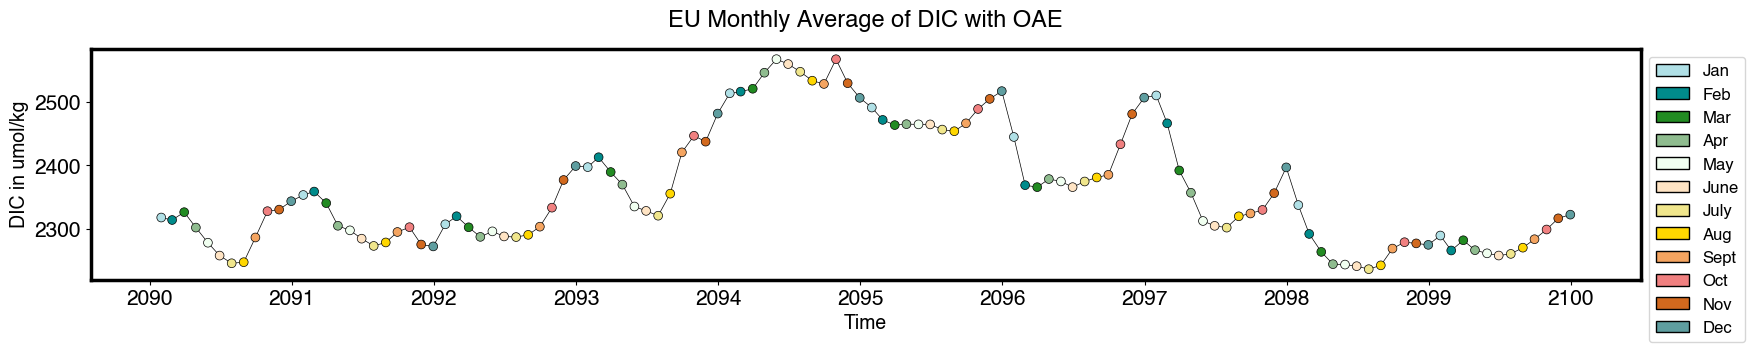

In [49]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(dic_oae_monthly.index, dic_oae_monthly.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(dic_oae_monthly.index, dic_oae_monthly.DIC, color=dic_oae_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC in umol/kg', fontsize=14)
ax.set_title("EU Monthly Average of DIC with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### EU Monthly Average of DIC (months displayed)

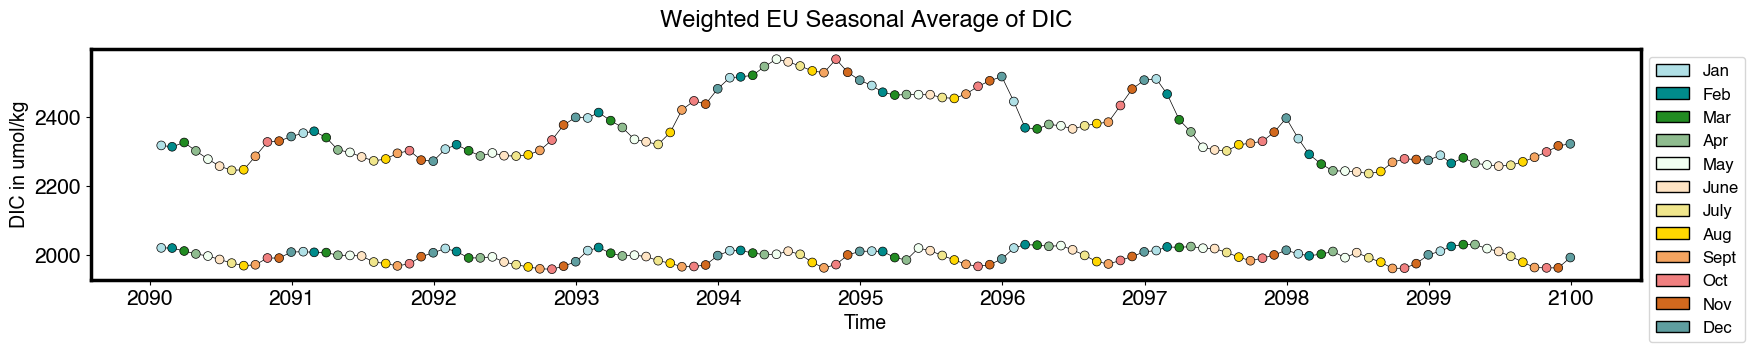

In [50]:
colors = dict(zip(dic_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(dic_baseline_monthly.index, dic_baseline_monthly.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(dic_baseline_monthly.index, dic_baseline_monthly.DIC, color=dic_baseline_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

ax.plot_date(dic_oae_monthly.index, dic_oae_monthly.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(dic_oae_monthly.index, dic_oae_monthly.DIC, color=dic_oae_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC in umol/kg', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of DIC", fontsize=17, y=1.06)

pass

### Δ DIC between Baseline and OAE from 2090 to 2100

In [52]:
delta_dic = dic_oae_monthly.DIC - dic_baseline_monthly.DIC

In [53]:
delta_dic = delta_dic.to_xarray()

In [54]:
delta_dic = delta_dic.to_dataframe('dic')
delta_dic['Month'] = pd.DatetimeIndex(delta_dic.index).month

In [56]:
conditions = [
    (delta_dic['Month'] == 1),
    (delta_dic['Month'] == 2),
    (delta_dic['Month'] == 3),
    (delta_dic['Month'] == 4),
    (delta_dic['Month'] == 5),
    (delta_dic['Month'] == 6),
    (delta_dic['Month'] == 7),
    (delta_dic['Month'] == 8),
    (delta_dic['Month'] == 9),
    (delta_dic['Month'] == 10),
    (delta_dic['Month'] == 11),
    (delta_dic['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

delta_dic['Month'] = np.select(conditions, values)

In [58]:
colors = dict(zip(delta_dic.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

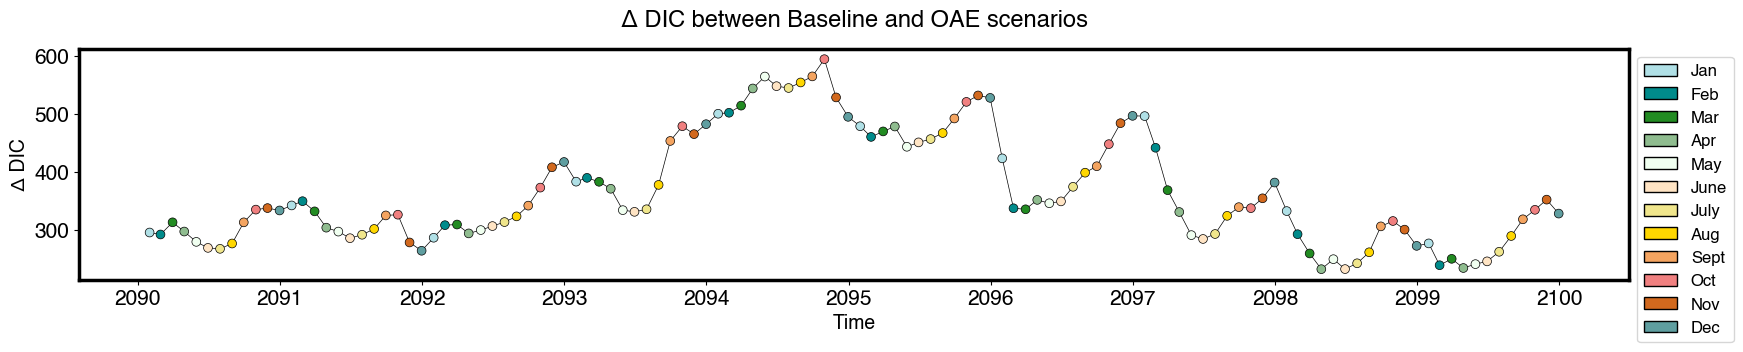

In [60]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(delta_dic.index, delta_dic.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(delta_dic.index, delta_dic.dic, color=delta_dic.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Δ DIC', fontsize=14)
ax.set_title("Δ DIC between Baseline and OAE scenarios", fontname="Helvetica", fontsize=17, y=1.06)

pass

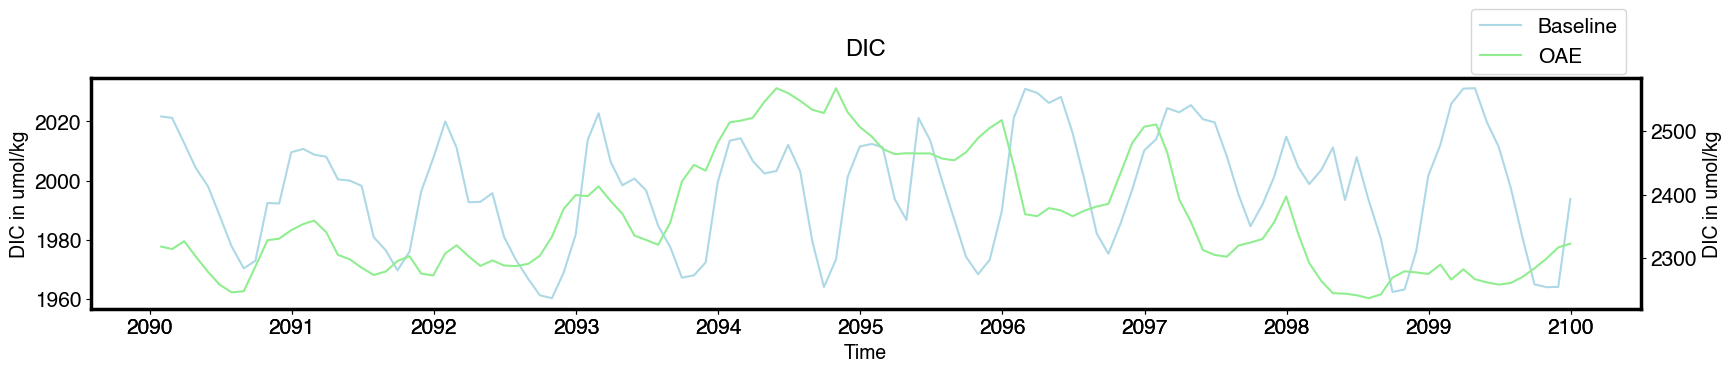

In [177]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(dic_baseline_monthly.index, dic_baseline_monthly.DIC, linewidth=1.5, color="lightblue", label = 'Baseline', zorder=1)
ax.set_ylabel('DIC in umol/kg', fontsize=14)

ax2.plot(dic_oae_monthly.index, dic_oae_monthly.DIC, linewidth=1.5, color="lightgreen", label = 'OAE', zorder=1)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('DIC in umol/kg', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('DIC', fontname="Helvetica", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.81, 1), loc='center left')
plt.show()